In [1]:
from hiive.mdptoolbox import example, mdp
from gym.envs.toy_text.frozen_lake import generate_random_map

# size: size of each side of the grid
# p: probability that a tile is frozen
# state is the agent's position on the grid; all possible positions == all possible states
random_map = generate_random_map(size=100, p=0.9)
# Transition (P)robability matrix and (R)eward matrix
frozen_P, frozen_R = example.openai("FrozenLake-v1", desc=random_map)

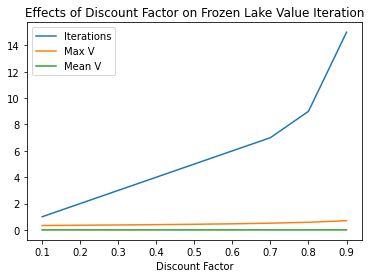

Converged in 15 iterations.
Running time: 2.244391679763794
[{'State': None, 'Action': None, 'Reward': 0.3333333333333333, 'Error': 0.3333333333333333, 'Time': 0.15155935287475586, 'Max V': 0.3333333333333333, 'Mean V': 6.666666666666666e-05, 'Iteration': 1}, {'State': None, 'Action': None, 'Reward': 0.4333333333333333, 'Error': 0.19999999999999998, 'Time': 0.302257776260376, 'Max V': 0.4333333333333333, 'Mean V': 0.00012666666666666666, 'Iteration': 2}, {'State': None, 'Action': None, 'Reward': 0.5233333333333333, 'Error': 0.09000000000000002, 'Time': 0.4565913677215576, 'Max V': 0.5233333333333333, 'Mean V': 0.00018666666666666666, 'Iteration': 3}, {'State': None, 'Action': None, 'Reward': 0.5683333333333332, 'Error': 0.08099999999999996, 'Time': 0.6057195663452148, 'Max V': 0.5683333333333332, 'Mean V': 0.0002442666666666666, 'Iteration': 4}, {'State': None, 'Action': None, 'Reward': 0.6061333333333332, 'Error': 0.06209999999999996, 'Time': 0.7454168796539307, 'Max V': 0.60613333333

In [2]:
# P: Transition probability matrices
# R: Reward matrices or vectors
# gamma: The per time-step discount factor on future rewards (0-1)
# epsilon: Stopping criterion below which change in the value function may fall (value function considered to have converged to optimal)
frozen_gammas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
frozen_gamma_iterations = []
frozen_gamma_max_vs = []
frozen_gamma_mean_vs = []
for g in frozen_gammas:
    frozen_gamma_vi = mdp.ValueIteration(frozen_P, frozen_R, gamma=g)
    frozen_gamma_vi.run()
    # Get last values for iteration, mean V and max V
    final = frozen_gamma_vi.run_stats[-1]
    frozen_gamma_iterations.append(final["Iteration"])
    frozen_gamma_max_vs.append(final["Max V"])
    frozen_gamma_mean_vs.append(final["Mean V"])
    # print(f"Optimal policy is: {frozen_gamma_vi.policy}")

import matplotlib.pyplot as plt

plt.figure()
plt.plot(frozen_gammas, frozen_gamma_iterations, label="Iterations")
plt.plot(frozen_gammas, frozen_gamma_max_vs, label="Max V")
plt.plot(frozen_gammas, frozen_gamma_mean_vs, label="Mean V")
plt.title(f"Effects of Discount Factor on Frozen Lake Value Iteration")
plt.xlabel("Discount Factor")
# plt.ylabel("")
plt.xticks(frozen_gammas)
plt.legend(loc="best")
filename = f"frozen_value_iter.png"
plt.savefig(filename, bbox_inches="tight")
plt.show()

# How many iterations does it take to converge?
print(f"Converged in {frozen_gamma_vi.iter} iterations.")
# CPU time to run
print(f"Running time: {frozen_gamma_vi.time}")
# print(frozen_gamma_vi.run_stats)

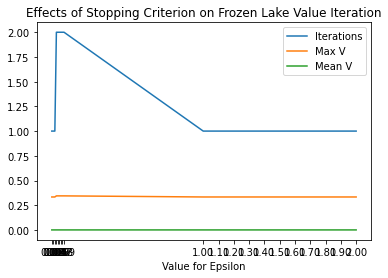

Converged in 1 iterations.
Running time: 0.1467604637145996


In [5]:
frozen_epsilon_epsilons = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]
frozen_epsilon_iterations = []
frozen_epsilon_max_vs = []
frozen_epsilon_mean_vs = []
for e in frozen_epsilon_epsilons:
    frozen_epsilon_vi = mdp.ValueIteration(frozen_P, frozen_R, gamma=0.1, epsilon=e)
    frozen_epsilon_vi.run()
    # Get last values for iteration, mean V and max V
    final = frozen_epsilon_vi.run_stats[-1]
    frozen_epsilon_iterations.append(final["Iteration"])
    frozen_epsilon_max_vs.append(final["Max V"])
    frozen_epsilon_mean_vs.append(final["Mean V"])
    # print(f"Optimal policy is: {frozen_epsilon_vi.policy}")

import matplotlib.pyplot as plt

plt.figure()
plt.plot(frozen_epsilon_epsilons, frozen_epsilon_iterations, label="Iterations")
plt.plot(frozen_epsilon_epsilons, frozen_epsilon_max_vs, label="Max V")
plt.plot(frozen_epsilon_epsilons, frozen_epsilon_mean_vs, label="Mean V")
plt.title(f"Effects of Stopping Criterion on Frozen Lake Value Iteration")
plt.xlabel("Value for Epsilon")
# plt.ylabel("")
plt.xticks(frozen_epsilon_epsilons)
plt.legend(loc="best")
filename = f"frozen_epsilon_value_iter1.png"
plt.savefig(filename, bbox_inches="tight")
plt.show()

# How many iterations does it take to converge?
print(f"Converged in {frozen_epsilon_vi.iter} iterations.")
# CPU time to run
print(f"Running time: {frozen_epsilon_vi.time}")
# print(frozen_epsilon_vi.run_stats)

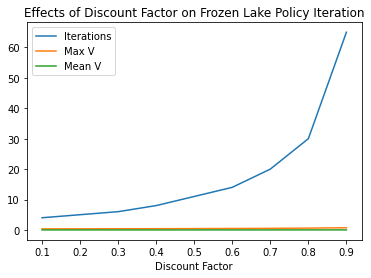

Converged in 65 iterations.
Running time: 232.86448454856873
[{'State': None, 'Action': None, 'Reward': 0.4761904761738724, 'Error': 0.14285714285216172, 'Time': 1.7832045555114746, 'V[0]': 0.0, 'Max V': 0.4761904761738724, 'Mean V': 0.00014036757917706508, 'Iteration': 1}, {'State': None, 'Action': None, 'Reward': 0.6846616470948549, 'Error': 0.08802761534249776, 'Time': 4.9907004833221436, 'V[0]': 0.0, 'Max V': 0.6846616470948549, 'Mean V': 0.00043129699591920546, 'Iteration': 2}, {'State': None, 'Action': None, 'Reward': 0.7070166732461863, 'Error': 0.05342792098552698, 'Time': 8.538899660110474, 'V[0]': 0.0, 'Max V': 0.7070166732461863, 'Mean V': 0.0007110820331343936, 'Iteration': 3}, {'State': None, 'Action': None, 'Reward': 0.7099446389816981, 'Error': 0.020791215011400774, 'Time': 12.08658504486084, 'V[0]': 0.0, 'Max V': 0.7099446389816981, 'Mean V': 0.0007775195377406545, 'Iteration': 4}, {'State': None, 'Action': None, 'Reward': 0.7099447979862468, 'Error': 0.0085727926200826

In [3]:
# P: Transition probability matrices
# R: Reward matrices or vectors
# gamma: The per time-step discount factor on future rewards (0-1)
frozenpi_gammas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
frozenpi_gamma_iterations = []
frozenpi_gamma_max_vs = []
frozenpi_gamma_mean_vs = []
for g in frozenpi_gammas:
    frozen_gamma_pi = mdp.PolicyIteration(frozen_P, frozen_R, gamma=g, eval_type=1)
    frozen_gamma_pi.run()
    final = frozen_gamma_pi.run_stats[-1]
    frozenpi_gamma_iterations.append(final["Iteration"])
    frozenpi_gamma_max_vs.append(final["Max V"])
    frozenpi_gamma_mean_vs.append(final["Mean V"])
    # print(f"Optimal policy is: {frozen_gamma_pi.policy}")
import matplotlib.pyplot as plt
plt.figure()
plt.plot(frozenpi_gammas, frozenpi_gamma_iterations, label="Iterations")
plt.plot(frozenpi_gammas, frozenpi_gamma_max_vs, label="Max V")
plt.plot(frozenpi_gammas, frozenpi_gamma_mean_vs, label="Mean V")
plt.title(f"Effects of Discount Factor on Frozen Lake Policy Iteration")
plt.xlabel("Discount Factor")
# plt.ylabel("")
plt.xticks(frozenpi_gammas)
plt.legend(loc="best")
filename = f"frozenpi_policy_iter.png"
plt.savefig(filename, bbox_inches="tight")
plt.show()

# print(f"Optimal policy is: {frozen_gamma_pi.policy}")
# How many iterations does it take to converge?
print(f"Converged in {frozen_gamma_pi.iter} iterations.")
# CPU time to run
print(f"Running time: {frozen_gamma_pi.time}")
# print(frozen_gamma_pi.run_stats)

{'State': None, 'Action': None, 'Reward': 0.6994825430857932, 'Error': 0.009607486057380016, 'Time': 1.9306433200836182, 'Max V': 0.6994825430857932, 'Mean V': 0.0006431048885873135, 'Iteration': 15}
15
15
15
{'State': None, 'Action': None, 'Reward': 0.7099483705929065, 'Error': 9.591529107987658e-06, 'Time': 240.02049708366394, 'V[0]': 0.0, 'Max V': 0.7099483705929065, 'Mean V': 0.0009344342527788605, 'Iteration': 65}
65
65
65


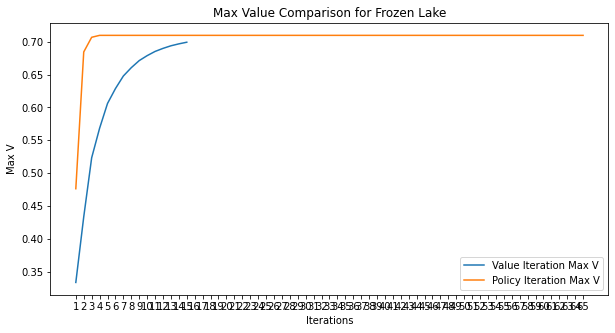

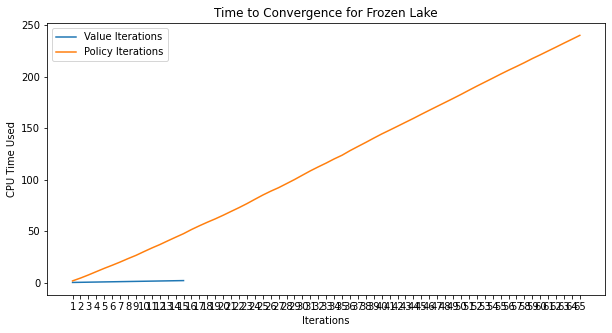

In [7]:
# TODO compare to PI
frozen_perf_vi = mdp.ValueIteration(frozen_P, frozen_R, gamma=0.9)
frozen_perf_vi.run()
# print(frozen_perf_vi.run_stats)
print(frozen_perf_vi.run_stats[-1])

frozen_perf_iterations = [i["Iteration"] for i in frozen_perf_vi.run_stats]
frozen_perf_max_vs = [i["Max V"] for i in frozen_perf_vi.run_stats]
frozen_perf_time = [i["Time"] for i in frozen_perf_vi.run_stats]

print(len(frozen_perf_iterations))
print(len(frozen_perf_max_vs))
print(len(frozen_perf_time))
# print(frozen_perf_vi.policy)

frozen_perf_pi = mdp.PolicyIteration(frozen_P, frozen_R, gamma=g, eval_type=1)
frozen_perf_pi.run()
print(frozen_perf_pi.run_stats[-1])

frozen_perf_pi_iterations = [i["Iteration"] for i in frozen_perf_pi.run_stats]
frozen_perf_pi_max_vs = [i["Max V"] for i in frozen_perf_pi.run_stats]
frozen_perf_pi_time = [i["Time"] for i in frozen_perf_pi.run_stats]

print(len(frozen_perf_pi_iterations))
print(len(frozen_perf_pi_max_vs))
print(len(frozen_perf_pi_time))
# print(frozen_perf_pi.policy)

plt.figure(figsize=(10,5))
plt.plot(frozen_perf_iterations, frozen_perf_max_vs, label="Value Iteration Max V")
plt.plot(frozen_perf_pi_iterations, frozen_perf_pi_max_vs, label="Policy Iteration Max V")
plt.title(f"Max Value Comparison for Frozen Lake")
plt.xlabel("Iterations")
plt.ylabel("Max V")
plt.xticks(frozen_perf_pi_iterations)
plt.legend(loc="best")
filename = f"frozen_perf_iter.png"
plt.savefig(filename, bbox_inches="tight")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(frozen_perf_iterations, frozen_perf_time, label="Value Iterations")
plt.plot(frozen_perf_pi_iterations, frozen_perf_pi_time, label="Policy Iterations")
plt.title(f"Time to Convergence for Frozen Lake")
plt.xlabel("Iterations")
plt.ylabel("CPU Time Used")
plt.xticks(frozen_perf_pi_iterations)
plt.legend(loc="best")
filename = f"frozen_time_iter.png"
plt.savefig(filename, bbox_inches="tight")
plt.show()